<a href="https://colab.research.google.com/github/anjaleeDS/Sandbox/blob/master/covid_tweet_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. get tweets from "real users" 

cleaning:
- limit 10+ followers, 10+friends
- search for sources that have "bot" or "corona" in name or high frequency
sources that have repeated texts, high frequency writers
- remove user_names with "bot" or "covid19" or "corona" or "covid" or "Team"
or "Management" or "Society" or "Company"
- tweet texts that have duplicates (multiple dates with same text)
- user_names that contain ".com"

~70000 rows and 9 columns

3. sentiment analysis (kaggle task)
2. geographical distro (kaggle task)



In [73]:
# libs

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gspread_dataframe import get_as_dataframe
import statistics as stats
import seaborn as sns


In [74]:
pip install vaderSentiment

In [75]:
#sentiment analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [76]:
#goog libs

# !pip install --upgrade gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('ctweets1').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
dump = get_as_dataframe(worksheet=worksheet, header=0)

In [77]:
# dump.text.value_counts()
dump.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,12:00 PM,NaN,NaN,########,110.0,234.0,486.0,0.0,########,We need @senatemajldr and the Senate to pass t...,"['HEROESact', 'COVID19']",Twitter for iPhone,0.0
1,6,everywhere,28 am/it/Individual Sovereign/ Ghost Writer/dr...,########,208.0,214.0,1860.0,0.0,########,@rodjgrimmer They're clearly documented a fina...,NaN,Twitter for Android,0.0
2,6,Decomposing,Probably on the Spectrum\n Between Asperger \ ...,########,95.0,423.0,1856.0,0.0,########,DELAYED INDEFINITELY Thanks #COVID19 https://t...,['COVID19'],Twitter Web App,0.0
3,166,"East of Vernal, West of Minsk",NaN,########,220.0,1393.0,949.0,0.0,########,#minneapolis leaders claim that masking for #c...,"['minneapolis', 'covid19']",Twitter Web App,0.0
4,166,"East of Vernal, West of Minsk",NaN,########,220.0,1393.0,949.0,0.0,########,@AlexBerenson When you're approach to #covid19...,['covid19'],Twitter Web App,0.0


In [78]:
#copy tweets into a separate column for cleaning
dump.tweet = dump.text
dump.insert(10, "tweet",dump.text, True) 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [79]:
t_df = dump

In [80]:
# t_df = dump[['text', 'tweet']]
t_df = t_df.dropna(thresh=5) #dropping all rows that have 5+ NAs


In [81]:
t_df.tail(10)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,tweet,hashtags,source,is_retweet
10563,Bridge Consulting,"Beijing, China","A mission-driven, issue-based communications c...",########,45.0,41.0,19.0,0.0,########,â€œWe must remember that most people are still...,â€œWe must remember that most people are still...,['COVID19'],Twitter Web App,0.0
10564,BRIDGEi2i,"Bangalore, Fremont",Leading AI Solutions company. Driving business...,########,6433.0,3583.0,2738.0,0.0,########,"""Digital adoption is going to intensify, &amp;...","""Digital adoption is going to intensify, &amp;...",['AI'],HubSpot,0.0
10565,Bridget BarclaySudol,NaN,Only follow me if you like aimless walks and a...,########,14.0,28.0,619.0,0.0,########,Care package in the time of a pandemic: just r...,Care package in the time of a pandemic: just r...,NaN,Twitter for iPhone,0.0
10566,Bridget Goulding,"Cork, Ireland",Mid-Cork: Nature Watcher: concerned++ re loss ...,########,806.0,1487.0,74660.0,0.0,########,Please everybody who needs to contact your fam...,Please everybody who needs to contact your fam...,"['respiratorysymptoms', 'COVID19']",Twitter for iPhone,0.0
10567,Bridget Welsh,malaysia,"Educator, Scholar and Political Analyst, Focus...",########,789.0,471.0,514.0,0.0,########,#Malaysia's PM #Muhyiddin at a national flag c...,#Malaysia's PM #Muhyiddin at a national flag c...,"['Malaysia', 'Muhyiddin', 'COVID19']",Twitter for Android,0.0
10568,"Bridgette M. Brawner, PhD, MDiv, APRN","Philadelphia, PA",Assoc. Prof. at @PennNursing; Chair of @anamfp...,########,1172.0,396.0,2646.0,0.0,########,"@DearPandemic, can you answer some timeline qu...","@DearPandemic, can you answer some timeline qu...",['COVID19'],Twitter for Android,0.0
10569,Brie Blackstone,"Federal Way, WA","girl who meanders, sings, writes, loves cultur...",########,159.0,1714.0,3935.0,0.0,########,@Hertz wow this is your gold standard of clean...,@Hertz wow this is your gold standard of clean...,"['pandemic', 'attitude']",Twitter for Android,0.0
10570,"Brief19, your daily roundup of SARS-CoV-2.","Everywhere, unfortunately",A daily roundup of SARS-CoV-2 / covid-19 resea...,########,14140.0,339.0,531.0,0.0,########,Antibody Levels Fall After SARS-CoV-2 Infectio...,Antibody Levels Fall After SARS-CoV-2 Infectio...,NaN,Twitter Web App,0.0
10571,=+TARANTINO+,OC. CA. USA.,KING SALOMON MUSIC,########,182.0,856.0,16.0,0.0,########,Be #Prepared. Get the proper gear. Get #educat...,Be #Prepared. Get the proper gear. Get #educat...,"['Prepared', 'educated', 'PPE', 'Covid19', 'pe...",Instagram,0.0
10572,=^..^=,USA/CAN,"âœ¨ðŸ‡ºðŸ‡¸ðŸ‡¨ðŸ‡¦ writer, humanitarian, anim...",########,3136.0,4756.0,41256.0,0.0,########,Dept of Liberalism actively DENYING patients t...,Dept of Liberalism actively DENYING patients t...,['Covid19'],Twitter Web App,0.0


In [82]:
t_df.tweet =t_df.tweet.str.replace(r'[^a-zA-Z0-9.\@,\' ]?', r'')
t_df.tail(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,tweet,hashtags,source,is_retweet
10563,Bridge Consulting,"Beijing, China","A mission-driven, issue-based communications c...",########,45.0,41.0,19.0,0.0,########,â€œWe must remember that most people are still...,We must remember that most people are still su...,['COVID19'],Twitter Web App,0.0
10564,BRIDGEi2i,"Bangalore, Fremont",Leading AI Solutions company. Driving business...,########,6433.0,3583.0,2738.0,0.0,########,"""Digital adoption is going to intensify, &amp;...","Digital adoption is going to intensify, amp in...",['AI'],HubSpot,0.0
10565,Bridget BarclaySudol,NaN,Only follow me if you like aimless walks and a...,########,14.0,28.0,619.0,0.0,########,Care package in the time of a pandemic: just r...,Care package in the time of a pandemic just re...,NaN,Twitter for iPhone,0.0
10566,Bridget Goulding,"Cork, Ireland",Mid-Cork: Nature Watcher: concerned++ re loss ...,########,806.0,1487.0,74660.0,0.0,########,Please everybody who needs to contact your fam...,Please everybody who needs to contact your fam...,"['respiratorysymptoms', 'COVID19']",Twitter for iPhone,0.0
10567,Bridget Welsh,malaysia,"Educator, Scholar and Political Analyst, Focus...",########,789.0,471.0,514.0,0.0,########,#Malaysia's PM #Muhyiddin at a national flag c...,Malaysia's PM Muhyiddin at a national flag cer...,"['Malaysia', 'Muhyiddin', 'COVID19']",Twitter for Android,0.0
10568,"Bridgette M. Brawner, PhD, MDiv, APRN","Philadelphia, PA",Assoc. Prof. at @PennNursing; Chair of @anamfp...,########,1172.0,396.0,2646.0,0.0,########,"@DearPandemic, can you answer some timeline qu...","@DearPandemic, can you answer some timeline qu...",['COVID19'],Twitter for Android,0.0
10569,Brie Blackstone,"Federal Way, WA","girl who meanders, sings, writes, loves cultur...",########,159.0,1714.0,3935.0,0.0,########,@Hertz wow this is your gold standard of clean...,@Hertz wow this is your gold standard of clean...,"['pandemic', 'attitude']",Twitter for Android,0.0
10570,"Brief19, your daily roundup of SARS-CoV-2.","Everywhere, unfortunately",A daily roundup of SARS-CoV-2 / covid-19 resea...,########,14140.0,339.0,531.0,0.0,########,Antibody Levels Fall After SARS-CoV-2 Infectio...,Antibody Levels Fall After SARSCoV2 Infection....,NaN,Twitter Web App,0.0
10571,=+TARANTINO+,OC. CA. USA.,KING SALOMON MUSIC,########,182.0,856.0,16.0,0.0,########,Be #Prepared. Get the proper gear. Get #educat...,Be Prepared. Get the proper gear. Get educated...,"['Prepared', 'educated', 'PPE', 'Covid19', 'pe...",Instagram,0.0
10572,=^..^=,USA/CAN,"âœ¨ðŸ‡ºðŸ‡¸ðŸ‡¨ðŸ‡¦ writer, humanitarian, anim...",########,3136.0,4756.0,41256.0,0.0,########,Dept of Liberalism actively DENYING patients t...,Dept of Liberalism actively DENYING patients t...,['Covid19'],Twitter Web App,0.0


EidalAdha knocks the door, it is crucial to reiterate that we are living in unusual times where normalcy has bec httpst.coZzmzFgPQPJ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The Senator representing Oyo Central stated that the decision to invite the ministers and the @NNPCgroup GMD arrive httpst.coFa5C3EuJ9Z {'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.1531}
Members of President Trumps New Jersey golf club jeered a reporter who asked why they weren't complying with a req httpst.conrcXLChC87 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Calling someone a germaphobe used to mean something. Now we have been told this is the new normal.   Not for me COVID19 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
URGENT Eleven Illinois counties are currently at a warning level for COVID19  Cass, Gallatin, Jackson, Jo Davies httpst.co0L5msk2Kao {'neg': 0.115, 'neu': 0.764, 'pos': 0.121, 'compound': 0.0343}
The Illinois Department of Public Health is reporting 1,467 new cases and 14 deaths today. New Totals 181,943 case httpst.covV1Ma6h6vT {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [83]:
# t_df = t_df.drop(axis=1, labels='sentiments')
# t_df

In [84]:
sents = []

analyzer = SentimentIntensityAnalyzer()
for t in t_df.tweet:
  vs = analyzer.polarity_scores(t)
  # print("{:-<65} {}".format(t, str(vs)))
  # print(str(vs))
  sents.append(str(vs))

t_df.insert(14, "sentiments",sents, True) 
t_df


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,tweet,hashtags,source,is_retweet,sentiments
0,12:00 PM,NaN,NaN,########,110.0,234.0,486.0,0.0,########,We need @senatemajldr and the Senate to pass t...,We need @senatemajldr and the Senate to pass t...,"['HEROESact', 'COVID19']",Twitter for iPhone,0.0,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou..."
1,6,everywhere,28 am/it/Individual Sovereign/ Ghost Writer/dr...,########,208.0,214.0,1860.0,0.0,########,@rodjgrimmer They're clearly documented a fina...,@rodjgrimmer They're clearly documented a fina...,NaN,Twitter for Android,0.0,"{'neg': 0.396, 'neu': 0.5, 'pos': 0.104, 'comp..."
2,6,Decomposing,Probably on the Spectrum\n Between Asperger \ ...,########,95.0,423.0,1856.0,0.0,########,DELAYED INDEFINITELY Thanks #COVID19 https://t...,DELAYED INDEFINITELY Thanks COVID19 httpst.coS...,['COVID19'],Twitter Web App,0.0,"{'neg': 0.309, 'neu': 0.352, 'pos': 0.34, 'com..."
3,166,"East of Vernal, West of Minsk",NaN,########,220.0,1393.0,949.0,0.0,########,#minneapolis leaders claim that masking for #c...,minneapolis leaders claim that masking for cov...,"['minneapolis', 'covid19']",Twitter Web App,0.0,"{'neg': 0.148, 'neu': 0.717, 'pos': 0.135, 'co..."
4,166,"East of Vernal, West of Minsk",NaN,########,220.0,1393.0,949.0,0.0,########,@AlexBerenson When you're approach to #covid19...,@AlexBerenson When you're approach to covid19 ...,['covid19'],Twitter Web App,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10568,"Bridgette M. Brawner, PhD, MDiv, APRN","Philadelphia, PA",Assoc. Prof. at @PennNursing; Chair of @anamfp...,########,1172.0,396.0,2646.0,0.0,########,"@DearPandemic, can you answer some timeline qu...","@DearPandemic, can you answer some timeline qu...",['COVID19'],Twitter for Android,0.0,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp..."
10569,Brie Blackstone,"Federal Way, WA","girl who meanders, sings, writes, loves cultur...",########,159.0,1714.0,3935.0,0.0,########,@Hertz wow this is your gold standard of clean...,@Hertz wow this is your gold standard of clean...,"['pandemic', 'attitude']",Twitter for Android,0.0,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp..."
10570,"Brief19, your daily roundup of SARS-CoV-2.","Everywhere, unfortunately",A daily roundup of SARS-CoV-2 / covid-19 resea...,########,14140.0,339.0,531.0,0.0,########,Antibody Levels Fall After SARS-CoV-2 Infectio...,Antibody Levels Fall After SARSCoV2 Infection....,NaN,Twitter Web App,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10571,=+TARANTINO+,OC. CA. USA.,KING SALOMON MUSIC,########,182.0,856.0,16.0,0.0,########,Be #Prepared. Get the proper gear. Get #educat...,Be Prepared. Get the proper gear. Get educated...,"['Prepared', 'educated', 'PPE', 'Covid19', 'pe...",Instagram,0.0,"{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'comp..."


In [85]:
# t_df.tweet =t_df.tweet.str.replace(r'[^a-zA-Z0-9.\@,\' ]?', r'')
# t_df.tail(10)

In [86]:
# t_df.sentiments.str.replace(r'[a-z:{}\' ]?', r'')

sscore = t_df.sentiments.str.replace(r'[a-z:{}\' ]?', r'')
sscore = sscore.str.split(pat=',',expand=True)
sscore.columns = ['neg', 'neu', 'pos', 'compound']

t_df.insert(15, "neg",sscore.neg, True) 
t_df.insert(16, "neu",sscore.neu, True) 
t_df.insert(17, "pos",sscore.pos, True) 
t_df.insert(18, "compound",sscore.compound, True) 


# t_df.sentiments.str.replace(r'[^a-zA-Z0-9.\@,\' ]?', r'')
# t_df.sentiments

In [87]:
t_df.iloc[:, [15,16,17,18]] = t_df.iloc[:,[15,16,17,18]].astype('float64')
t_df.infer_objects().dtypes

t_df.dtypes

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified       float64
date                 object
text                 object
tweet                object
hashtags             object
source               object
is_retweet          float64
sentiments           object
neg                 float64
neu                 float64
pos                 float64
compound            float64
dtype: object

In [88]:
# t_df.tweet[(t_df.neu > 0.8)]
t_df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'tweet', 'hashtags', 'source', 'is_retweet',
       'sentiments', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

# score of happy vs sad by 'username'

then recommendation for similar 'username' tweeters

In [89]:
#sentiment profiles
senti_profiles = pd.DataFrame(columns=['user_name', 'avg_pos', 'avg_neu','avg_neg', 'avg_compound'])
senti_profiles.user_name = t_df.user_name
senti_profiles = senti_profiles.drop_duplicates(subset=['user_name'])

senti_profiles.infer_objects().dtypes
# senti_profiles.iloc[:, [1,2,3,4]] = senti_profiles.iloc[:, [1,2,3,4]].astype('float64')


user_name        object
avg_pos         float64
avg_neu         float64
avg_neg         float64
avg_compound    float64
dtype: object

In [90]:
# get average of sentiments for each user

for user in senti_profiles.user_name:
  # print('\n..MEAN.',stats.mean(t_df.compound[(t_df.user_name==user)]), '....', user, (t_df.compound[(t_df.user_name==user)]), '....\n', ) 
  senti_profiles.avg_compound[(senti_profiles.user_name==user)] = stats.mean(t_df.compound[(t_df.user_name==user)])
  senti_profiles.avg_neg[(senti_profiles.user_name==user)] = stats.mean(t_df.neg[(t_df.user_name==user)])
  senti_profiles.avg_pos[(senti_profiles.user_name==user)] = stats.mean(t_df.pos[(t_df.user_name==user)])
  senti_profiles.avg_neu[(senti_profiles.user_name==user)] = stats.mean(t_df.neu[(t_df.user_name==user)])

# senti_profiles
# t_df.compound[(t_df.user_name==166)]

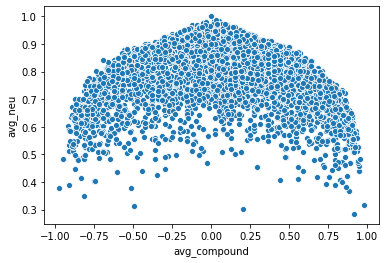

In [91]:

sns.scatterplot(x=senti_profiles.avg_compound, y=senti_profiles.avg_neu)

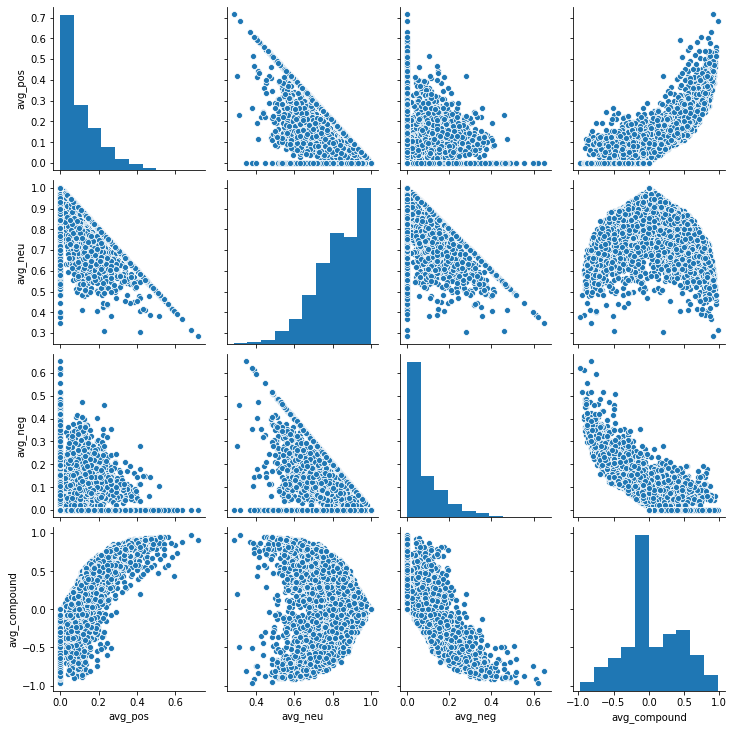

In [92]:
sns.pairplot(data=senti_profiles)

In [93]:
t_df.describe()

,user_followers,user_friends,user_favourites,user_verified,is_retweet,neg,neu,pos,compound
count,1.057300e+04,10573.000000,10573.000000,10573.000000,10573.0,10573.000000,10573.000000,10573.000000,10573.000000
mean,1.040839e+05,1772.033292,16519.724865,0.080015,0.0,0.064787,0.845005,0.090203,0.059261
std,7.255898e+05,7345.941242,44384.889599,0.271329,0.0,0.101040,0.137116,0.113141,0.414302
min,1.100000e+01,11.000000,0.000000,0.000000,0.0,0.000000,0.284000,0.000000,-0.973200
25%,1.770000e+02,217.000000,515.000000,0.000000,0.0,0.000000,0.753000,0.000000,-0.153100
50%,6.910000e+02,631.000000,2684.000000,0.000000,0.0,0.000000,0.854000,0.000000,0.000000
75%,2.578000e+03,1638.000000,12737.000000,0.000000,0.0,0.120000,1.000000,0.157000,0.401900
max,1.018641e+07,445949.000000,666784.000000,1.000000,0.0,0.651000,1.000000,0.716000,0.976800


In [94]:
senti_profiles.describe()

,user_name,avg_pos,avg_neu,avg_neg,avg_compound
count,6795,6795.0,6795.0,6795.0,6795.0
unique,6795,1017.0,1180.0,898.0,1842.0
top,BOAM ingenuity,0.0,1.0,0.0,0.0
freq,1,2922.0,1687.0,3838.0,1710.0


#TF-IDF for recommendations

Recommend who to follow if you want generally negative, positive or neutral tweets

In [95]:
tfidf = TfidfVectorizer(stop_words='english')
ihotel = ihotel.fillna('')

tfidf_matrix = tfidf.fit_transform(ihotel.clean_desc)


NameError: ignored

In [ ]:
tfidf_matrix.shape

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape
# (cosine_sim<0).sum()

In [ ]:
indices = pd.Series(ihotel.index, index=ihotel.property_name).drop_duplicates()

In [ ]:
indices

In [ ]:
indices.value_counts().max()

In [ ]:
idx = indices['TRH Pipalkoti']
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:11]
movie_indices =  [i[0] for i in sim_scores]
movie_indices

In [ ]:
idx

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return ihotel.clean_desc.iloc[movie_indices] 

In [ ]:
get_recommendations('TRH Pipalkoti')